<a href="https://colab.research.google.com/github/morfant/TF_study/blob/master/book_study_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in colab
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

# print("hello world")

# print(tf.__version__)

rand = tf.random.uniform([1], 0, 1)
# print(rand)

rand = tf.random.normal([4],)
# print(rand)
import numpy as np
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))






In [4]:
# simple neuron

x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

# output = sigmoid(x  *  w)
# w = w + x(input) * a(learning rate) * error

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)


99 0.13151007237020318 0.8684899276297968
199 0.0596195615356776 0.9403804384643224
299 0.037990750367986936 0.9620092496320131
399 0.02776712099097156 0.9722328790090284
499 0.02184367589535241 0.9781563241046476
599 0.01798839145072173 0.9820116085492783
699 0.015282641442504019 0.984717358557496
799 0.01328053427137632 0.9867194657286237
899 0.01173988597542941 0.9882601140245706
999 0.01051811795718105 0.989481882042819


In [13]:
# AND


x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    
    output = sigmoid(np.sum(x[j]*w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error # why?
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)
    print()
    print("w:", w, "b:", b)


199 -0.11357334597238422

w: tf.Tensor([2.6428323 2.65514  ], shape=(2,), dtype=float32) b: tf.Tensor([-4.2272797], shape=(1,), dtype=float32)
399 -0.06683987887632652

w: tf.Tensor([3.8168528 3.829645 ], shape=(2,), dtype=float32) b: tf.Tensor([-5.9466286], shape=(1,), dtype=float32)
599 -0.04725397594118746

w: tf.Tensor([4.57335 4.58295], shape=(2,), dtype=float32) b: tf.Tensor([-7.0644774], shape=(1,), dtype=float32)
799 -0.036437022345171585

w: tf.Tensor([5.130764  5.1382756], shape=(2,), dtype=float32) b: tf.Tensor([-7.8917093], shape=(1,), dtype=float32)
999 -0.02959417434384095

w: tf.Tensor([5.5712905 5.57742  ], shape=(2,), dtype=float32) b: tf.Tensor([-8.547059], shape=(1,), dtype=float32)
1199 -0.024886766057984434

w: tf.Tensor([5.9350157 5.9401813], shape=(2,), dtype=float32) b: tf.Tensor([-9.088984], shape=(1,), dtype=float32)
1399 -0.021454312898401533

w: tf.Tensor([6.2444835 6.248939 ], shape=(2,), dtype=float32) b: tf.Tensor([-9.550561], shape=(1,), dtype=float32)
1

In [12]:
for i in range(4):
  print('x:', x[i], 'y:', y[i], 'output:', sigmoid(np.sum(x[i]*w) + b))

x: [1 1] y: [1] output: 0.9646630746344013
x: [1 0] y: [0] output: 0.025039800157310735
x: [0 1] y: [0] output: 0.025116850356616406
x: [0 0] y: [0] output: 2.4238121387543318e-05


In [33]:
# OR

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error 
    error_sum += error


  if i % 200 == 199:
    print(i, error_sum)
    # print()
    # print("w:", w, "b:", b)

199 -0.04643780761771743
399 -0.02500550233278777
599 -0.01699454068546978
799 -0.012827286671453983
999 -0.010283304509393291
1199 -0.00857269600826404
1399 -0.007345541258035222
1599 -0.0064226213289243494
1799 -0.005704716755221086
1999 -0.005128752278386543


In [36]:
for i in range(4):
  print("x:", x[i], "y:", y[i], "error_sum:", error_sum, 'output:', sigmoid(np.sum(x[i]*w) + b_x * b))

x: [1 1] y: [0] error_sum: 1.8614210173240053e-09 output: 0.5128176323940516
x: [1 0] y: [1] error_sum: 1.8614210173240053e-09 output: 0.5128176314633411
x: [0 1] y: [1] error_sum: 1.8614210173240053e-09 output: 0.4999999990686774
x: [0 0] y: [0] error_sum: 1.8614210173240053e-09 output: 0.49999999813735485


In [35]:
# XOR

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j] * w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error 
    error_sum += error


  if i % 200 == 199:
    print(i, error_sum)
    # print()
    # print("w:", w, "b:", b)

199 0.0048021309689803005
399 0.00019520410919826592
599 7.935249870416605e-06
799 3.285408403108647e-07
999 2.792131748030613e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [66]:
# XOR, network

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model.fit(x, y, epochs=4000, batch_size=1)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 1502/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 1503/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 1504/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2440
Epoch 1505/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2440
Epoch 1506/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2439
Epoch 1507/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 1508/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2437
Epoch 1509/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 1510/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 1511/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2437
Epoch 1512/4000
4/4 [==============================] - 0s 1ms/s

In [42]:
model.predict(x)

array([[0.14816076],
       [0.83415914],
       [0.8209282 ],
       [0.1711325 ]], dtype=float32)

In [43]:
for w in model.weights:
  print(w)

<tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.5831516,  4.284473 ],
       [-3.8204107, -4.1431212]], dtype=float32)>
<tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([-2.00421 ,  2.245283], dtype=float32)>
<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 5.129118],
       [-4.773688]], dtype=float32)>
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([2.1298087], dtype=float32)>


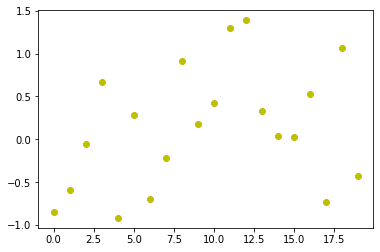

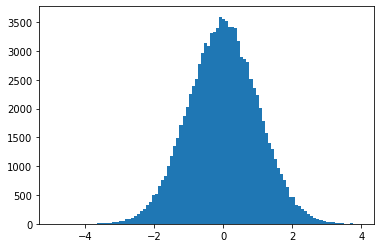

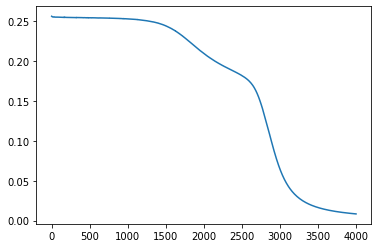

In [70]:
# plot

import matplotlib.pyplot as plt
plt_x = range(20)
plt_y = tf.random.normal([20], 0, 1)
plt.plot(plt_x, plt_y, 'yo')
plt.show()

rand = tf.random.normal([100000], 0, 1)
plt.hist(rand, bins=100)
plt.show()

plt.plot(history.history['loss'])
plt.show()
